# MNIST ÏÜêÍ∏ÄÏî® Ïà´Ïûê Î∂ÑÎ•ò ÌäúÌÜ†Î¶¨Ïñº

Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî PyTorchÎ•º ÏÇ¨Ïö©ÌïòÏó¨ MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏÜêÍ∏ÄÏî® Ïà´ÏûêÎ•º Î∂ÑÎ•òÌïòÎäî Í∞ÑÎã®Ìïú Multi-Layer Perceptron (MLP) Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌï©ÎãàÎã§.

## ÌïôÏäµ Î™©Ìëú
1. PyTorchÎ•º Ïù¥Ïö©Ìïú Í∏∞Î≥∏Ï†ÅÏù∏ Ïã†Í≤ΩÎßù Íµ¨ÌòÑ
2. Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ï Ïù¥Ìï¥
3. Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä Í≥ºÏ†ï Ï≤¥Ìóò
4. ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî Î∞è Î∂ÑÏÑù

## Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥
- **MNIST**: 28x28 ÌîΩÏÖÄÏùò ÌùëÎ∞± ÏÜêÍ∏ÄÏî® Ïà´Ïûê Ïù¥ÎØ∏ÏßÄ (0-9)
- **ÌõàÎ†® Îç∞Ïù¥ÌÑ∞**: 60,000Í∞ú
- **ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞**: 10,000Í∞ú

## 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

Î®ºÏ†Ä ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§ÏùÑ ÏûÑÌè¨Ìä∏Ìï©ÎãàÎã§:

- **torch**: PyTorchÏùò ÌïµÏã¨ ÎùºÏù¥Î∏åÎü¨Î¶¨
- **torch.nn**: Ïã†Í≤ΩÎßù Î†àÏù¥Ïñ¥ÏôÄ ÏÜêÏã§Ìï®Ïàò
- **torch.optim**: ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶ò (Adam, SGD Îì±)
- **torchvision.transforms**: Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨
- **datasets**: HuggingFace Îç∞Ïù¥ÌÑ∞ÏÖã ÎùºÏù¥Î∏åÎü¨Î¶¨
- **matplotlib**: ÏãúÍ∞ÅÌôî
- **numpy**: ÏàòÏπò Í≥ÑÏÇ∞

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("Using CPU")

PyTorch version: 2.8.0+cu126
CUDA available: True
GPU: Tesla T4


## 2. MLP (Multi-Layer Perceptron) Î™®Îç∏ Ï†ïÏùò

Í∞ÑÎã®Ìïú 3Ï∏µ Ïã†Í≤ΩÎßùÏùÑ Íµ¨ÌòÑÌï©ÎãàÎã§:

1. **ÏûÖÎ†•Ï∏µ**: 784Í∞ú Îâ¥Îü∞ (28√ó28 ÌîΩÏÖÄÏùÑ 1Ï∞®ÏõêÏúºÎ°ú ÌéºÏπ®)
2. **ÏùÄÎãâÏ∏µ**: 100Í∞ú Îâ¥Îü∞ + ReLU ÌôúÏÑ±Ìôî Ìï®Ïàò
3. **Ï∂úÎ†•Ï∏µ**: 10Í∞ú Îâ¥Îü∞ (0-9 ÌÅ¥ÎûòÏä§)

### Ï£ºÏöî Í∞úÎÖê:
- **nn.Linear**: Fully Connected Layer (ÌòπÏùÄ Dense Layer)
- **nn.ReLU**: ReLU ÌôúÏÑ±Ìôî Ìï®Ïàò (ÏùåÏàòÎäî 0, ÏñëÏàòÎäî Í∑∏ÎåÄÎ°ú)
- **nn.Sequential**: Î†àÏù¥Ïñ¥Îì§ÏùÑ ÏàúÏ∞®Ï†ÅÏúºÎ°ú Ïó∞Í≤∞

In [2]:
class MLP(nn.Module):
    def __init__(self, input_size=784, hidden_size=100, num_classes=10):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),  # 784 -> 100
            nn.ReLU(),                          # ÌôúÏÑ±Ìôî Ìï®Ïàò
            nn.Linear(hidden_size, num_classes) # 100 -> 10
        )

    def forward(self, x):
        """
        ÏàúÏ†ÑÌåå Ìï®Ïàò // forward propagation
        x: ÏûÖÎ†• ÌÖêÏÑú (batch_size, 784)
        return: Ï∂úÎ†• ÌÖêÏÑú (batch_size, 10)
        """
        return self.layers(x)

# Î™®Îç∏ ÏÉùÏÑ± Î∞è Íµ¨Ï°∞ ÌôïÏù∏
model = MLP()
print("Î™®Îç∏ Íµ¨Ï°∞:")
print(model)

# ÌååÎùºÎØ∏ÌÑ∞ Í∞úÏàò Í≥ÑÏÇ∞
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nÏ¥ù ÌååÎùºÎØ∏ÌÑ∞ Ïàò: {total_params:,}")
print(f"ÌïôÏäµ Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞ Ïàò: {trainable_params:,}")

# Í∞Å Î†àÏù¥Ïñ¥Î≥Ñ ÌååÎùºÎØ∏ÌÑ∞ Ïàò ÌôïÏù∏
print("\nÎ†àÏù¥Ïñ¥Î≥Ñ ÌååÎùºÎØ∏ÌÑ∞:")
for name, param in model.named_parameters():
    print(f"{name}: {param.shape} ({param.numel():,} Í∞ú)")

Î™®Îç∏ Íµ¨Ï°∞:
MLP(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)

Ï¥ù ÌååÎùºÎØ∏ÌÑ∞ Ïàò: 79,510
ÌïôÏäµ Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞ Ïàò: 79,510

Î†àÏù¥Ïñ¥Î≥Ñ ÌååÎùºÎØ∏ÌÑ∞:
layers.0.weight: torch.Size([100, 784]) (78,400 Í∞ú)
layers.0.bias: torch.Size([100]) (100 Í∞ú)
layers.2.weight: torch.Size([10, 100]) (1,000 Í∞ú)
layers.2.bias: torch.Size([10]) (10 Í∞ú)


## 3. Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨

### 3.1 ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï

Î®ºÏ†Ä ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Îì§ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§:

- **batch_size**: Ìïú Î≤àÏóê Ï≤òÎ¶¨Ìï† Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò
- **learning_rate**: ÌïôÏäµÎ•† (ÎÑàÎ¨¥ ÌÅ¨Î©¥ Î∞úÏÇ∞, ÎÑàÎ¨¥ ÏûëÏúºÎ©¥ ÌïôÏäµÏù¥ ÎäêÎ¶º)
- **epochs**: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î™á Î≤à Î∞òÎ≥µÌï†ÏßÄ

In [3]:
# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
batch_size = 128        # Î∞∞Ïπò ÌÅ¨Í∏∞
test_batch_size = 1000  # ÌÖåÏä§Ìä∏ Î∞∞Ïπò ÌÅ¨Í∏∞ (Î©îÎ™®Î¶¨ Ìö®Ïú®ÏùÑ ÏúÑÌï¥ ÌÅ¨Í≤å ÏÑ§Ï†ï)
learning_rate = 1e-3    # ÌïôÏäµÎ•† (0.001)
nb_epochs = 3           # ÏóêÌè¨ÌÅ¨ Ïàò

print("=== ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ===")
print(f"Î∞∞Ïπò ÌÅ¨Í∏∞: {batch_size}")
print(f"ÌÖåÏä§Ìä∏ Î∞∞Ïπò ÌÅ¨Í∏∞: {test_batch_size}")
print(f"ÌïôÏäµÎ•†: {learning_rate}")
print(f"ÏóêÌè¨ÌÅ¨ Ïàò: {nb_epochs}")

# ÎîîÎ∞îÏù¥Ïä§ ÏÑ§Ï†ï (GPUÍ∞Ä ÏûàÏúºÎ©¥ GPU ÏÇ¨Ïö©)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nÏÇ¨Ïö© ÎîîÎ∞îÏù¥Ïä§: {device}")
if device.type == "cuda":
    print(f"GPU Ïù¥Î¶Ñ: {torch.cuda.get_device_name(0)}")
    print(f"GPU Î©îÎ™®Î¶¨: {torch.cuda.get_device_properties(0).total_memory // 1024**3} GB")

=== ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ===
Î∞∞Ïπò ÌÅ¨Í∏∞: 128
ÌÖåÏä§Ìä∏ Î∞∞Ïπò ÌÅ¨Í∏∞: 1000
ÌïôÏäµÎ•†: 0.001
ÏóêÌè¨ÌÅ¨ Ïàò: 3

ÏÇ¨Ïö© ÎîîÎ∞îÏù¥Ïä§: cuda
GPU Ïù¥Î¶Ñ: Tesla T4
GPU Î©îÎ™®Î¶¨: 14 GB


### 3.2 MNIST Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî©

HuggingFace datasets ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌïòÏó¨ MNIST Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌï©ÎãàÎã§.

In [4]:
# MNIST Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî©
print("MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïö¥Î°úÎìú Ï§ë...")
mnist = load_dataset("mnist")

# Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥ Ï∂úÎ†•
print("\n=== Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥ ===")
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {len(mnist['train']):,}Í∞ú")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {len(mnist['test']):,}Í∞ú")
print(f"ÌÅ¥ÎûòÏä§ Ïàò: {len(set(mnist['train']['label']))}Í∞ú (0-9)")
print(f"Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: {mnist['train'][0]['image'].size}")

# ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
sample_image = mnist['train'][0]['image']
sample_label = mnist['train'][0]['label']
print(f"\nÏ≤´ Î≤àÏß∏ ÏÉòÌîå: ÎùºÎ≤® {sample_label}")

# ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò ÌôïÏù∏
from collections import Counter
label_counts = Counter(mnist['train']['label'])
print("\nÌÅ¥ÎûòÏä§Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:")
for i in range(10):
    print(f"Ïà´Ïûê {i}: {label_counts[i]:,}Í∞ú")

MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïö¥Î°úÎìú Ï§ë...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

mnist/train-00000-of-00001.parquet:   0%|          | 0.00/15.6M [00:00<?, ?B/s]

mnist/test-00000-of-00001.parquet:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]


=== Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥ ===
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 60,000Í∞ú
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 10,000Í∞ú
ÌÅ¥ÎûòÏä§ Ïàò: 10Í∞ú (0-9)
Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: (28, 28)

Ï≤´ Î≤àÏß∏ ÏÉòÌîå: ÎùºÎ≤® 5

ÌÅ¥ÎûòÏä§Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:
Ïà´Ïûê 0: 5,923Í∞ú
Ïà´Ïûê 1: 6,742Í∞ú
Ïà´Ïûê 2: 5,958Í∞ú
Ïà´Ïûê 3: 6,131Í∞ú
Ïà´Ïûê 4: 5,842Í∞ú
Ïà´Ïûê 5: 5,421Í∞ú
Ïà´Ïûê 6: 5,918Í∞ú
Ïà´Ïûê 7: 6,265Í∞ú
Ïà´Ïûê 8: 5,851Í∞ú
Ïà´Ïûê 9: 5,949Í∞ú


### 3.3 ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

ÌïôÏäµÌïòÍ∏∞ Ï†ÑÏóê Îç∞Ïù¥ÌÑ∞Í∞Ä Ïñ¥ÎñªÍ≤å ÏÉùÍ≤ºÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

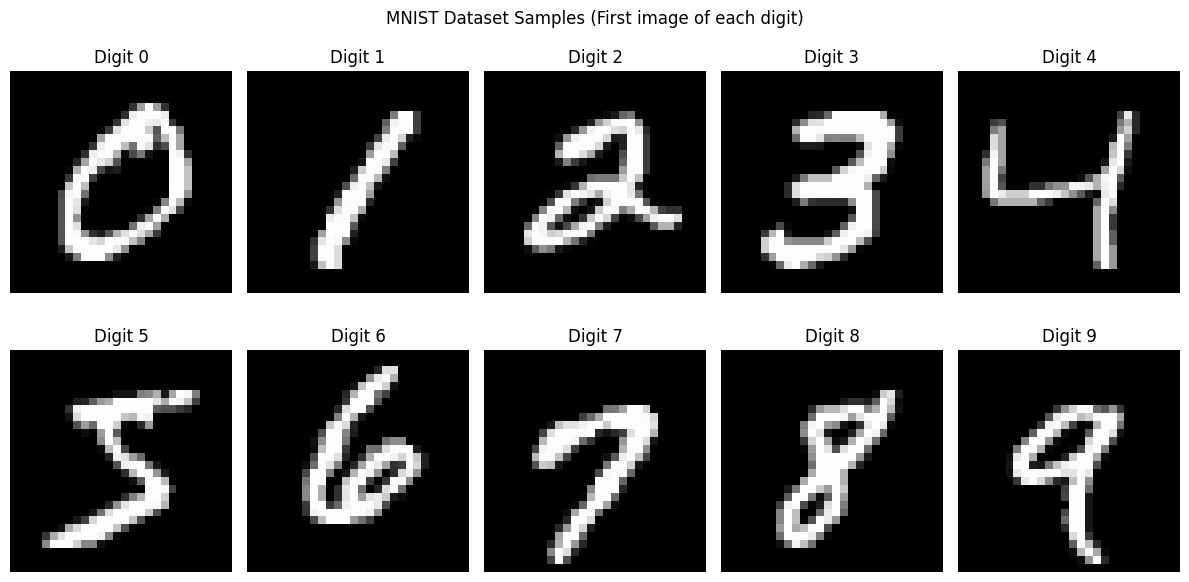

In [5]:
# ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÎì§ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for i in range(10):
    # Í∞Å Ïà´Ïûê(0-9)Ïóê ÎåÄÌï¥ Ï≤´ Î≤àÏß∏ ÏÉòÌîå Ï∞æÍ∏∞
    for j, label in enumerate(mnist['train']['label']):
        if label == i:
            image = mnist['train'][j]['image']
            axes[i].imshow(image, cmap='gray')
            axes[i].set_title(f'Digit {i}')
            axes[i].axis('off')
            break

plt.tight_layout()
plt.suptitle('MNIST Dataset Samples (First image of each digit)', y=1.02)
plt.show()

### 3.4 Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (Normalization)

Ïã†Í≤ΩÎßùÏùò ÌïôÏäµÏùÑ ÏïàÏ†ïÌôîÌïòÍ∏∞ ÏúÑÌï¥ ÌîΩÏÖÄ Í∞íÏùÑ Ï†ïÍ∑úÌôîÌï©ÎãàÎã§:
1. ÌîΩÏÖÄ Í∞íÏùÑ 0-1 Î≤îÏúÑÎ°ú Î≥ÄÌôò (ToTensor())
2. ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º Ïù¥Ïö©Ìï¥ Ï†ïÍ∑úÌôî (Normalize())

Ï†ïÍ∑úÌôî Í≥µÏãù: `(ÌîΩÏÖÄÍ∞í - ÌèâÍ∑†) / ÌëúÏ§ÄÌé∏Ï∞®`

In [6]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞ (1000Í∞ú ÏÉòÌîåÎ°ú Ï∂îÏ†ï)
print("Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÜµÍ≥Ñ Ï†ïÎ≥¥Î•º Í≥ÑÏÇ∞ Ï§ë...")
sample_data = torch.stack([
    transforms.ToTensor()(mnist['train'][i]['image'])
    for i in range(1000)
])

mean = sample_data.mean().item()
std = sample_data.std().item()
print(f"ÌèâÍ∑†(mean): {mean:.4f}")
print(f"ÌëúÏ§ÄÌé∏Ï∞®(std): {std:.4f}")

# Transform Ï†ïÏùò
transform = transforms.Compose([
    transforms.ToTensor(),           # PIL Image -> Tensor, 0-255 -> 0-1
    transforms.Normalize((mean,), (std,))  # Ï†ïÍ∑úÌôî
])

print("\nÎ≥ÄÌôò ÌååÏù¥ÌîÑÎùºÏù∏:")
print("1. ToTensor(): PIL Image -> PyTorch Tensor (0-255 -> 0-1)")
print(f"2. Normalize(): (ÌîΩÏÖÄÍ∞í - {mean:.4f}) / {std:.4f}")

# Î≥ÄÌôò Ï†ÑÌõÑ ÎπÑÍµê
original_pixel = mnist['train'][0]['image']
transformed = transform(original_pixel)
print(f"\nÎ≥ÄÌôò ÏòàÏãú:")
print(f"ÏõêÎ≥∏ ÌîΩÏÖÄ Î≤îÏúÑ: 0-255")
print(f"ToTensor ÌõÑ: 0-1")
print(f"Ï†ïÍ∑úÌôî ÌõÑ Î≤îÏúÑ: ÏïΩ {transformed.min():.2f} ~ {transformed.max():.2f}")

Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÜµÍ≥Ñ Ï†ïÎ≥¥Î•º Í≥ÑÏÇ∞ Ï§ë...
ÌèâÍ∑†(mean): 0.1282
ÌëúÏ§ÄÌé∏Ï∞®(std): 0.3051

Î≥ÄÌôò ÌååÏù¥ÌîÑÎùºÏù∏:
1. ToTensor(): PIL Image -> PyTorch Tensor (0-255 -> 0-1)
2. Normalize(): (ÌîΩÏÖÄÍ∞í - 0.1282) / 0.3051

Î≥ÄÌôò ÏòàÏãú:
ÏõêÎ≥∏ ÌîΩÏÖÄ Î≤îÏúÑ: 0-255
ToTensor ÌõÑ: 0-1
Ï†ïÍ∑úÌôî ÌõÑ Î≤îÏúÑ: ÏïΩ -0.42 ~ 2.86


### 3.5 DataLoader ÏÉùÏÑ±

DataLoaderÎäî Îç∞Ïù¥ÌÑ∞Î•º Î∞∞Ïπò Îã®ÏúÑÎ°ú Î∂àÎü¨Ïò§Í≥†, ÏÖîÌîåÎßÅ Îì±Ïùò Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§.

In [7]:
# Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò Ìï®Ïàò Ï†ïÏùò
def transform_dataset(dataset):
    """Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Î≥ÄÌôòÏùÑ Ï†ÅÏö©ÌïòÎäî Ìï®Ïàò"""
    def transform_fn(batch):
        # Ïù¥ÎØ∏ÏßÄÎ•º ÌÖêÏÑúÎ°ú Î≥ÄÌôòÌïòÍ≥† 28x28ÏùÑ 784Î°ú ÌèâÌÉÑÌôî
        images = [transform(img).view(-1) for img in batch["image"]]
        return {
            "image": torch.stack(images),
            "label": torch.tensor(batch["label"])
        }
    return dataset.with_transform(transform_fn)

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Î≥ÄÌôò Ï†ÅÏö©
print("Îç∞Ïù¥ÌÑ∞ÏÖã Î≥ÄÌôò Ï§ë...")
train_dataset = transform_dataset(mnist["train"])
test_dataset = transform_dataset(mnist["test"])

# DataLoader ÏÉùÏÑ±
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Îäî ÏÑûÍ∏∞
)
test_loader = DataLoader(
    test_dataset,
    batch_size=test_batch_size,
    shuffle=False  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî ÏàúÏÑú Ïú†ÏßÄ
)

print(f"ÌõàÎ†® DataLoader: {len(train_loader)}Í∞ú Î∞∞Ïπò")
print(f"ÌÖåÏä§Ìä∏ DataLoader: {len(test_loader)}Í∞ú Î∞∞Ïπò")
print(f"Î∞∞ÏπòÎãπ ÌõàÎ†® ÏÉòÌîå: {batch_size}Í∞ú")
print(f"Î∞∞ÏπòÎãπ ÌÖåÏä§Ìä∏ ÏÉòÌîå: {test_batch_size}Í∞ú")

# Ï≤´ Î≤àÏß∏ Î∞∞Ïπò ÌôïÏù∏
sample_batch = next(iter(train_loader))
print(f"\nÏ≤´ Î≤àÏß∏ Î∞∞Ïπò shape:")
print(f"Ïù¥ÎØ∏ÏßÄ: {sample_batch['image'].shape}  # (batch_size, 784)")
print(f"ÎùºÎ≤®: {sample_batch['label'].shape}    # (batch_size,)")

Îç∞Ïù¥ÌÑ∞ÏÖã Î≥ÄÌôò Ï§ë...
ÌõàÎ†® DataLoader: 469Í∞ú Î∞∞Ïπò
ÌÖåÏä§Ìä∏ DataLoader: 10Í∞ú Î∞∞Ïπò
Î∞∞ÏπòÎãπ ÌõàÎ†® ÏÉòÌîå: 128Í∞ú
Î∞∞ÏπòÎãπ ÌÖåÏä§Ìä∏ ÏÉòÌîå: 1000Í∞ú

Ï≤´ Î≤àÏß∏ Î∞∞Ïπò shape:
Ïù¥ÎØ∏ÏßÄ: torch.Size([128, 784])  # (batch_size, 784)
ÎùºÎ≤®: torch.Size([128])    # (batch_size,)


## 4. Î™®Îç∏ ÌõàÎ†®

### 4.1 Î™®Îç∏, ÏÜêÏã§Ìï®Ïàò, ÏµúÏ†ÅÌôîÍ∏∞ ÏÑ§Ï†ï

In [8]:
# Î™®Îç∏ Ï¥àÍ∏∞Ìôî (Ïù¥Ï†ÑÏóê ÏÉùÏÑ±Ìïú model Ïû¨ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥† ÏÉàÎ°ú ÏÉùÏÑ±)
model = MLP().to(device)  # Î™®Îç∏ÏùÑ GPUÎ°ú Ïù¥Îèô (ÏûàÎã§Î©¥)

# ÏÜêÏã§Ìï®Ïàò: Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•òÎ•º ÏúÑÌïú CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# ÏµúÏ†ÅÌôîÍ∏∞: Adam (Ï†ÅÏùëÏ†Å ÌïôÏäµÎ•† ÏïåÍ≥†Î¶¨Ï¶ò)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print("=== ÌõàÎ†® ÏÑ§Ï†ï ===")
print(f"Î™®Îç∏: {model.__class__.__name__}")
print(f"ÏÜêÏã§Ìï®Ïàò: {criterion.__class__.__name__}")
print(f"ÏµúÏ†ÅÌôîÍ∏∞: {optimizer.__class__.__name__}")
print(f"ÎîîÎ∞îÏù¥Ïä§: {device}")
print(f"Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞ Ïàò: {sum(p.numel() for p in model.parameters()):,}Í∞ú")

# ÌõàÎ†® ÏÑ§Ï†ï ÏöîÏïΩ
print(f"\n=== ÌõàÎ†® Ï†ïÎ≥¥ ===")
print(f"Ï†ÑÏ≤¥ ÏóêÌè¨ÌÅ¨: {nb_epochs}")
print(f"Î∞∞Ïπò ÌÅ¨Í∏∞: {batch_size}")
print(f"ÌïôÏäµÎ•†: {learning_rate}")
print(f"ÏóêÌè¨ÌÅ¨Îãπ Î∞∞Ïπò Ïàò: {len(train_loader)}")
print(f"ÏóêÌè¨ÌÅ¨Îãπ ÌõàÎ†® ÏÉòÌîå Ïàò: {len(train_loader) * batch_size:,}")
print(f"Ï†ÑÏ≤¥ ÌõàÎ†® Ïä§ÌÖù: {nb_epochs * len(train_loader):,}")

=== ÌõàÎ†® ÏÑ§Ï†ï ===
Î™®Îç∏: MLP
ÏÜêÏã§Ìï®Ïàò: CrossEntropyLoss
ÏµúÏ†ÅÌôîÍ∏∞: Adam
ÎîîÎ∞îÏù¥Ïä§: cuda
Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞ Ïàò: 79,510Í∞ú

=== ÌõàÎ†® Ï†ïÎ≥¥ ===
Ï†ÑÏ≤¥ ÏóêÌè¨ÌÅ¨: 3
Î∞∞Ïπò ÌÅ¨Í∏∞: 128
ÌïôÏäµÎ•†: 0.001
ÏóêÌè¨ÌÅ¨Îãπ Î∞∞Ïπò Ïàò: 469
ÏóêÌè¨ÌÅ¨Îãπ ÌõàÎ†® ÏÉòÌîå Ïàò: 60,032
Ï†ÑÏ≤¥ ÌõàÎ†® Ïä§ÌÖù: 1,407


### 4.2 ÌõàÎ†® Î£®ÌîÑ Ïã§Ìñâ

Ïã†Í≤ΩÎßù ÌõàÎ†®Ïùò Í∏∞Î≥∏ Îã®Í≥Ñ:
1. **Forward Pass**: ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Î•º Î™®Îç∏Ïóê ÌÜµÍ≥ºÏãúÏºú ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞
2. **Loss Í≥ÑÏÇ∞**: ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞íÏùò Ï∞®Ïù¥(Ïò§Ï∞®) Í≥ÑÏÇ∞
3. **Backward Pass**: Ïó≠Ï†ÑÌååÎ•º ÌÜµÌï¥ Í∞Å ÌååÎùºÎØ∏ÌÑ∞Ïùò Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞
4. **Parameter Update**: ÏµúÏ†ÅÌôîÍ∏∞Î•º ÏÇ¨Ïö©Ìï¥ ÌååÎùºÎØ∏ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏

In [9]:
# ÌõàÎ†® Í≥ºÏ†ï Ï∂îÏ†ÅÏùÑ ÏúÑÌïú Î¶¨Ïä§Ìä∏
train_losses = []
train_accuracies = []
test_accuracies = []

print("=== ÌõàÎ†® ÏãúÏûë ===\n")

for epoch in range(nb_epochs):
    # ÌõàÎ†® Î™®ÎìúÎ°ú ÏÑ§Ï†ï
    model.train()

    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, batch in enumerate(train_loader):
        # Îç∞Ïù¥ÌÑ∞Î•º ÎîîÎ∞îÏù¥Ïä§Î°ú Ïù¥Îèô
        imgs = batch["image"].to(device)
        labels = batch["label"].to(device)

        # Í∑∏ÎûòÎîîÏñ∏Ìä∏ Ï¥àÍ∏∞Ìôî
        optimizer.zero_grad()

        # Forward pass
        outputs = model(imgs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # ÌååÎùºÎØ∏ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏
        optimizer.step()

        # ÌÜµÍ≥Ñ ÏóÖÎç∞Ïù¥Ìä∏
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        # 100 Î∞∞ÏπòÎßàÎã§ Ï§ëÍ∞Ñ Í≤∞Í≥º Ï∂úÎ†•
        if (batch_idx + 1) % 100 == 0:
            current_loss = running_loss / (batch_idx + 1)
            current_acc = 100 * correct_train / total_train
            print(f"Epoch [{epoch+1}/{nb_epochs}], Batch [{batch_idx+1}/{len(train_loader)}]")
            print(f"  Loss: {current_loss:.4f}, Train Acc: {current_acc:.2f}%")

    # ÏóêÌè¨ÌÅ¨ Ï¢ÖÎ£å ÌõÑ ÌõàÎ†® ÌÜµÍ≥Ñ
    epoch_loss = running_loss / len(train_loader)
    epoch_train_acc = 100 * correct_train / total_train
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_train_acc)

    print(f"\nEpoch [{epoch+1}/{nb_epochs}] ÌõàÎ†® ÏôÑÎ£å:")
    print(f"  ÌèâÍ∑† Loss: {epoch_loss:.4f}")
    print(f"  ÌõàÎ†® Ï†ïÌôïÎèÑ: {epoch_train_acc:.2f}%")

    # ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
    model.eval()  # ÌèâÍ∞Ä Î™®ÎìúÎ°ú ÏÑ§Ï†ï
    correct_test = 0
    total_test = 0

    with torch.no_grad():  # Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ ÎπÑÌôúÏÑ±Ìôî
        for batch in test_loader:
            imgs = batch["image"].to(device)
            labels = batch["label"].to(device)

            outputs = model(imgs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_acc = 100 * correct_test / total_test
    test_accuracies.append(test_acc)
    print(f"  ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {test_acc:.2f}%")
    print("-" * 60)

print(f"\n=== ÌõàÎ†® ÏôÑÎ£å ===")
print(f"ÏµúÏ¢Ö ÌõàÎ†® Ï†ïÌôïÎèÑ: {train_accuracies[-1]:.2f}%")
print(f"ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {test_accuracies[-1]:.2f}%")

=== ÌõàÎ†® ÏãúÏûë ===

Epoch [1/3], Batch [100/469]
  Loss: 0.6092, Train Acc: 82.50%
Epoch [1/3], Batch [200/469]
  Loss: 0.4499, Train Acc: 87.11%
Epoch [1/3], Batch [300/469]
  Loss: 0.3828, Train Acc: 88.92%
Epoch [1/3], Batch [400/469]
  Loss: 0.3402, Train Acc: 90.15%

Epoch [1/3] ÌõàÎ†® ÏôÑÎ£å:
  ÌèâÍ∑† Loss: 0.3198
  ÌõàÎ†® Ï†ïÌôïÎèÑ: 90.78%
  ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 95.01%
------------------------------------------------------------
Epoch [2/3], Batch [100/469]
  Loss: 0.1636, Train Acc: 95.25%
Epoch [2/3], Batch [200/469]
  Loss: 0.1670, Train Acc: 95.14%
Epoch [2/3], Batch [300/469]
  Loss: 0.1596, Train Acc: 95.37%
Epoch [2/3], Batch [400/469]
  Loss: 0.1519, Train Acc: 95.61%

Epoch [2/3] ÌõàÎ†® ÏôÑÎ£å:
  ÌèâÍ∑† Loss: 0.1478
  ÌõàÎ†® Ï†ïÌôïÎèÑ: 95.73%
  ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 96.37%
------------------------------------------------------------
Epoch [3/3], Batch [100/469]
  Loss: 0.1052, Train Acc: 96.95%
Epoch [3/3], Batch [200/469]
  Loss: 0.1061, Train Acc: 96.88%
Epoch [3/3]

## 5. Í≤∞Í≥º Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî

### 5.1 ÌõàÎ†® Í≥ºÏ†ï ÏãúÍ∞ÅÌôî

LossÏôÄ Ï†ïÌôïÎèÑÏùò Î≥ÄÌôîÎ•º Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

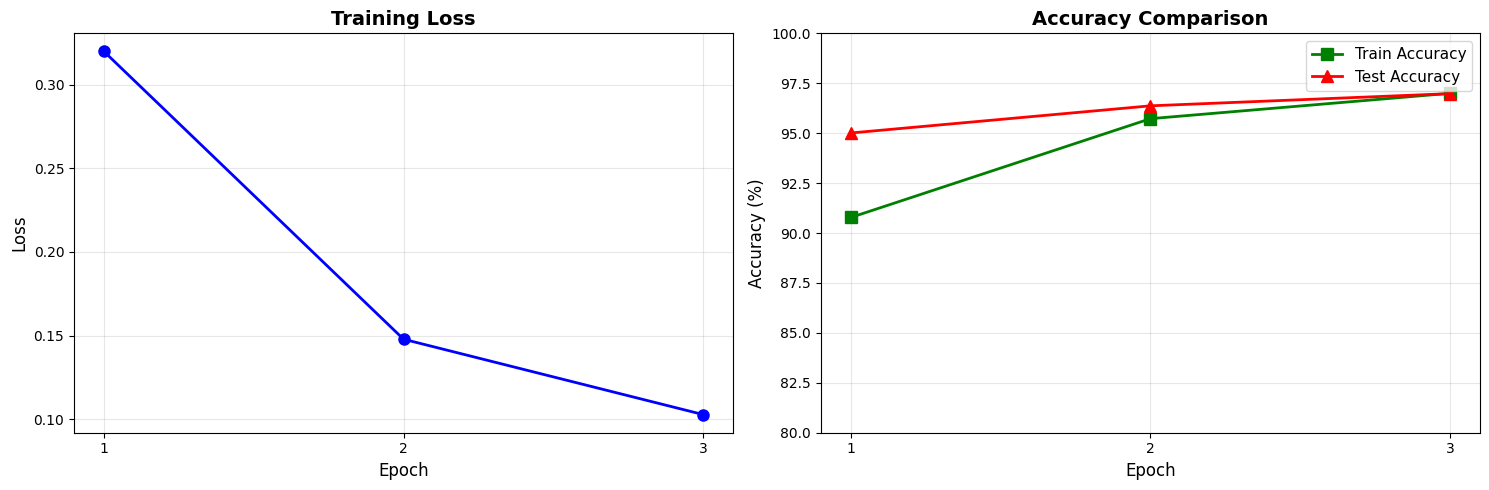

=== ÏµúÏ¢Ö Í≤∞Í≥º ÏöîÏïΩ ===
ÏµúÏ¢Ö ÌõàÎ†® Loss: 0.1027
ÏµúÏ¢Ö ÌõàÎ†® Ï†ïÌôïÎèÑ: 97.00%
ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 96.98%
Í≥ºÏ†ÅÌï© Ï†ïÎèÑ: 0.02% (ÌõàÎ†®-ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ Ï∞®Ïù¥)


In [10]:
# ÌõàÎ†® Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Loss Í∑∏ÎûòÌîÑ
epochs_range = range(1, nb_epochs + 1)
ax1.plot(epochs_range, train_losses, 'b-', marker='o', linewidth=2, markersize=8)
ax1.set_title('Training Loss', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(epochs_range)

# Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ
ax2.plot(epochs_range, train_accuracies, 'g-', marker='s', linewidth=2,
         markersize=8, label='Train Accuracy')
ax2.plot(epochs_range, test_accuracies, 'r-', marker='^', linewidth=2,
         markersize=8, label='Test Accuracy')
ax2.set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)
ax2.set_xticks(epochs_range)
ax2.set_ylim(80, 100)

plt.tight_layout()
plt.show()

# ÏµúÏ¢Ö Í≤∞Í≥º ÏöîÏïΩ
print("=== ÏµúÏ¢Ö Í≤∞Í≥º ÏöîÏïΩ ===")
print(f"ÏµúÏ¢Ö ÌõàÎ†® Loss: {train_losses[-1]:.4f}")
print(f"ÏµúÏ¢Ö ÌõàÎ†® Ï†ïÌôïÎèÑ: {train_accuracies[-1]:.2f}%")
print(f"ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {test_accuracies[-1]:.2f}%")
print(f"Í≥ºÏ†ÅÌï© Ï†ïÎèÑ: {train_accuracies[-1] - test_accuracies[-1]:.2f}% (ÌõàÎ†®-ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ Ï∞®Ïù¥)")

### 5.2 ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî

Î™®Îç∏Ïù¥ Ïã§Ï†úÎ°ú Ïñ¥ÎñªÍ≤å ÏòàÏ∏°ÌïòÎäîÏßÄ ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. Ïò¨Î∞îÎ•∏ ÏòàÏ∏°Í≥º ÌãÄÎ¶∞ ÏòàÏ∏°ÏùÑ Î™®Îëê ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.

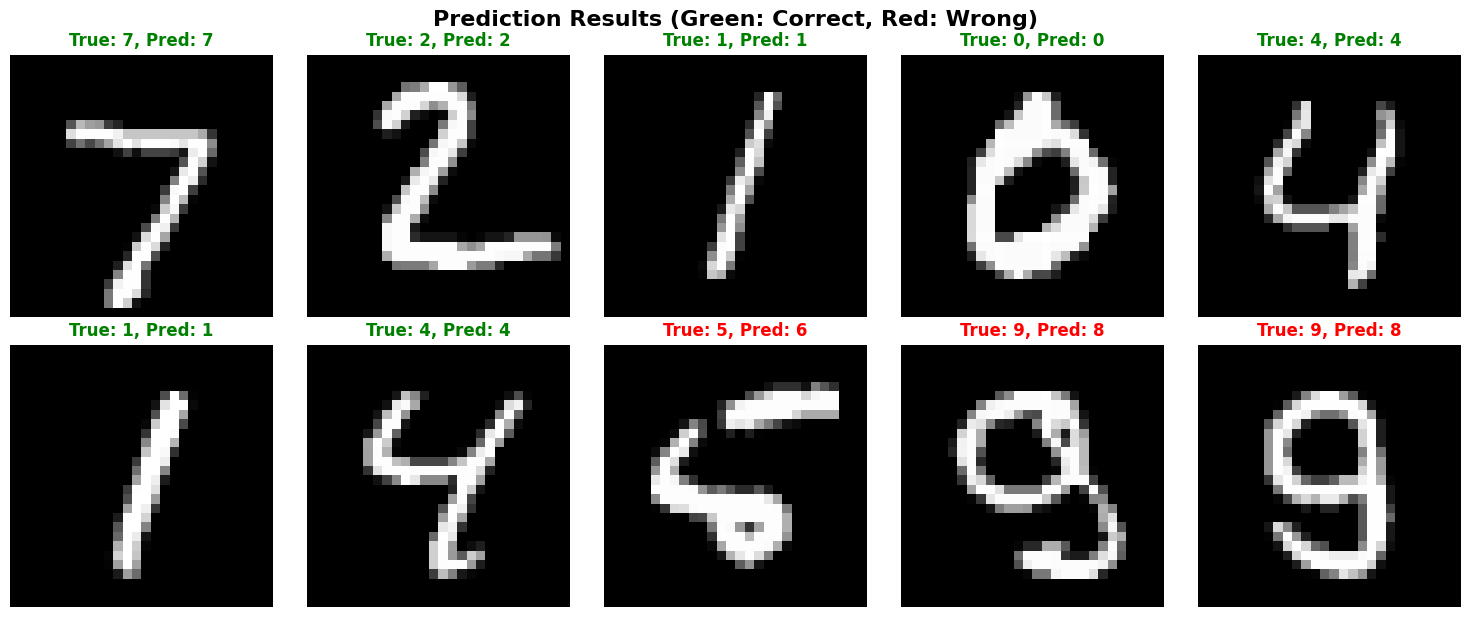

Ïò¨Î∞îÎ•∏ ÏòàÏ∏°: 7Í∞ú
ÌãÄÎ¶∞ ÏòàÏ∏°: 3Í∞ú


In [11]:
# ÏòàÏ∏° ÏÉòÌîå ÏàòÏßë
model.eval()
correct_samples = []
wrong_samples = []

with torch.no_grad():
    for batch in test_loader:
        imgs = batch["image"].to(device)
        labels = batch["label"].to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, 1)

        # Ï†ïÌôïÌïú ÏòàÏ∏°Í≥º ÌãÄÎ¶∞ ÏòàÏ∏° Î∂ÑÎ¶¨
        for i in range(len(imgs)):
            if len(correct_samples) >= 7 and len(wrong_samples) >= 3:
                break

            sample = (imgs[i], labels[i], predicted[i], outputs[i])
            if labels[i] == predicted[i] and len(correct_samples) < 7:
                correct_samples.append(sample)
            elif labels[i] != predicted[i] and len(wrong_samples) < 3:
                wrong_samples.append(sample)

        if len(correct_samples) >= 7 and len(wrong_samples) >= 3:
            break

# ÏãúÍ∞ÅÌôî: 7Í∞ú ÎßûÏ∂ò Í≤É + 3Í∞ú ÌãÄÎ¶∞ Í≤É
display_samples = correct_samples + wrong_samples

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, (img, true_label, pred_label, output) in enumerate(display_samples):
    # 28x28Î°ú reshape (Ï†ïÍ∑úÌôîÎêú ÏÉÅÌÉú)
    img_display = img.cpu().view(28, 28)

    # Ï†ïÍ∑úÌôîÎ•º Ïó≠Î≥ÄÌôò (ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥)
    img_display = img_display * std + mean
    img_display = torch.clamp(img_display, 0, 1)

    axes[i].imshow(img_display, cmap='gray')

    # ÏÉâÏÉÅ ÏÑ§Ï†ï: ÎßûÏúºÎ©¥ Ï¥àÎ°ù, ÌãÄÎ¶¨Î©¥ Îπ®Í∞ï
    color = 'green' if true_label == pred_label else 'red'
    axes[i].set_title(f'True: {true_label.item()}, Pred: {pred_label.item()}', color=color, fontweight='bold')
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle('Prediction Results (Green: Correct, Red: Wrong)', y=1.02, fontsize=16, fontweight='bold')
plt.show()

print(f"Ïò¨Î∞îÎ•∏ ÏòàÏ∏°: {len([s for s in display_samples if s[1] == s[2]])}Í∞ú")
print(f"ÌãÄÎ¶∞ ÏòàÏ∏°: {len([s for s in display_samples if s[1] != s[2]])}Í∞ú")

### 5.3 Î™®Îç∏Ïùò ÌôïÏã†ÎèÑ Î∂ÑÏÑù

ÌãÄÎ¶¨Í≤å ÏòàÏ∏°Ìïú Í≤ΩÏö∞, Î™®Îç∏Ïù¥ Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌï¥ ÏñºÎßàÎÇò ÌôïÏã†ÌñàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

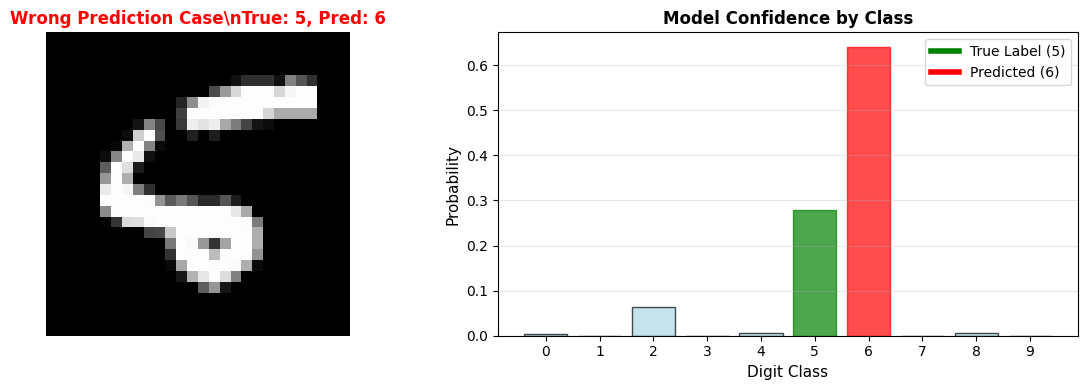

\n=== Î™®Îç∏Ïùò ÏÉÅÏúÑ 3Í∞ú ÏòàÏ∏° ===
1ÏúÑ: Ïà´Ïûê 6 (ÌôïÎ•†: 64.10%)
2ÏúÑ: Ïà´Ïûê 5 (ÌôïÎ•†: 27.94%)
3ÏúÑ: Ïà´Ïûê 2 (ÌôïÎ•†: 6.27%)
\nÏã§Ï†ú ÎùºÎ≤® 5Ïùò ÌôïÎ•†: 27.94%


In [12]:
# ÌãÄÎ¶∞ ÏòàÏ∏°Ïóê ÎåÄÌïú ÏÉÅÏÑ∏ Î∂ÑÏÑù
if wrong_samples:
    wrong_img, wrong_true, wrong_pred, wrong_output = wrong_samples[0]

    # ÏÜåÌîÑÌä∏Îß•Ïä§Î•º ÌÜµÌï¥ ÌôïÎ•†Î°ú Î≥ÄÌôò
    probabilities = torch.softmax(wrong_output, dim=0).cpu()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # ÏôºÏ™Ω: ÌãÄÎ¶∞ ÏòàÏ∏° Ïù¥ÎØ∏ÏßÄ
    img_display = wrong_img.cpu().view(28, 28) * std + mean
    img_display = torch.clamp(img_display, 0, 1)
    ax1.imshow(img_display, cmap='gray')
    ax1.set_title(f'Wrong Prediction Case\\nTrue: {wrong_true.item()}, Pred: {wrong_pred.item()}',
                  color='red', fontsize=12, fontweight='bold')
    ax1.axis('off')

    # Ïò§Î•∏Ï™Ω: ÌôïÎ•† Î∂ÑÌè¨
    bars = ax2.bar(range(10), probabilities, alpha=0.7, color='lightblue', edgecolor='black')

    # Ïã§Ï†ú ÎùºÎ≤®Í≥º ÏòàÏ∏° ÎùºÎ≤® Í∞ïÏ°∞
    bars[wrong_true.item()].set_color('green')
    bars[wrong_pred.item()].set_color('red')

    ax2.set_xlabel('Digit Class', fontsize=11)
    ax2.set_ylabel('Probability', fontsize=11)
    ax2.set_title('Model Confidence by Class', fontsize=12, fontweight='bold')
    ax2.set_xticks(range(10))
    ax2.grid(axis='y', alpha=0.3)

    # Î≤îÎ°Ä Ï∂îÍ∞Ä
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color='green', lw=4, label=f'True Label ({wrong_true.item()})'),
                       Line2D([0], [0], color='red', lw=4, label=f'Predicted ({wrong_pred.item()})')]
    ax2.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()

    # ÏÉÅÏúÑ 3Í∞ú ÌôïÎ•† Ï∂úÎ†•
    top3_probs, top3_indices = torch.topk(probabilities, 3)
    print("\\n=== Î™®Îç∏Ïùò ÏÉÅÏúÑ 3Í∞ú ÏòàÏ∏° ===")
    for i, (prob, idx) in enumerate(zip(top3_probs, top3_indices)):
        print(f"{i+1}ÏúÑ: Ïà´Ïûê {idx.item()} (ÌôïÎ•†: {prob.item()*100:.2f}%)")

    print(f"\\nÏã§Ï†ú ÎùºÎ≤® {wrong_true.item()}Ïùò ÌôïÎ•†: {probabilities[wrong_true.item()]*100:.2f}%")

else:
    print("ÌãÄÎ¶∞ ÏòàÏ∏° ÏÉòÌîåÏù¥ ÏóÜÏäµÎãàÎã§. Î™®Îç∏Ïù¥ Î™®Îì† ÌÖåÏä§Ìä∏ ÏÉòÌîåÏùÑ Ï†ïÌôïÌûà ÏòàÏ∏°ÌñàÏäµÎãàÎã§!")

## 6. Í≥ºÏ†ú Î∞è Ïã§Ìóò

### üí° ÌïôÏäµÏùÑ ÏúÑÌïú Ïã§Ìóò Ï†úÏïà

Ïù¥Ï†ú Í∏∞Î≥∏ Î™®Îç∏ÏùÑ Ïù¥Ìï¥ÌñàÏúºÎãà, Îã§ÏùåÍ≥º Í∞ôÏùÄ Ïã§ÌóòÎì§ÏùÑ Ìï¥Î≥¥ÏÑ∏Ïöî:

#### üîß **Try 1: ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù**
- ÌïôÏäµÎ•†ÏùÑ Î∞îÍøîÎ≥¥ÏÑ∏Ïöî (`learning_rate = 1e-2`, `1e-4` Îì±)
- ÏùÄÎãâÏ∏µ ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌï¥Î≥¥ÏÑ∏Ïöî (`hidden_size = 50`, `200` Îì±)
- ÏóêÌè¨ÌÅ¨ ÏàòÎ•º ÎäòÎ†§Î≥¥ÏÑ∏Ïöî (`nb_epochs = 5` ÎòêÎäî `10`)

#### üèóÔ∏è **Try 2: Î™®Îç∏ Íµ¨Ï°∞ Í∞úÏÑ†**
- ÏùÄÎãâÏ∏µÏùÑ Îçî Ï∂îÍ∞ÄÌï¥Î≥¥ÏÑ∏Ïöî (3Ï∏µ, 4Ï∏µ Ïã†Í≤ΩÎßù)
- Îã§Î•∏ ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏãúÎèÑÌï¥Î≥¥ÏÑ∏Ïöî (`nn.Tanh()`, `nn.Sigmoid()`)
- DropoutÏùÑ Ï∂îÍ∞ÄÌï¥ÏÑú Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌï¥Î≥¥ÏÑ∏Ïöî

#### üìà **Try 3: ÏÑ±Îä• Î∂ÑÏÑù**
- Confusion Matrix Í∑∏Î¶¨Í∏∞
- ÌÅ¥ÎûòÏä§Î≥Ñ Ï†ïÌôïÎèÑ Î∂ÑÏÑù
- ÏûòÎ™ª Î∂ÑÎ•òÎêú Ïù¥ÎØ∏ÏßÄÎì§Ïùò Ìå®ÌÑ¥ Ï∞æÍ∏∞

### üìù **Ïã§Ìóò Í≤∞Í≥º Í∏∞Î°ùÌïòÍ∏∞**
Í∞Å Ïã§Ìóò ÌõÑ Îã§ÏùåÏùÑ Í∏∞Î°ùÌï¥Î≥¥ÏÑ∏Ïöî:
- ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ
- ÌõàÎ†® ÏãúÍ∞Ñ
- Í¥ÄÏ∞∞Îêú Ìå®ÌÑ¥Ïù¥ÎÇò Ïù∏ÏÇ¨Ïù¥Ìä∏

In [13]:
# Ïã§ÌóòÏùÑ ÏúÑÌïú Îπà ÏÖÄ
# Ïó¨Í∏∞ÏÑú ÏúÑÏóêÏÑú Ï†úÏïàÌïú Ïã§ÌóòÎì§ÏùÑ ÏßÑÌñâÌï¥Î≥¥ÏÑ∏Ïöî!

# ÏòàÏãú: ÌïôÏäµÎ•†ÏùÑ Î∞îÍøîÏÑú Ïû¨ÌõàÎ†®
# learning_rate = 1e-2  # ÏõêÎûòÎ≥¥Îã§ 10Î∞∞ ÌÅ∞ ÌïôÏäµÎ•†
# model = MLP().to(device)
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)
#
# ÏúÑÏùò ÌõàÎ†® Î£®ÌîÑÎ•º Îã§Ïãú Ïã§ÌñâÌïòÍ≥† Í≤∞Í≥ºÎ•º ÎπÑÍµêÌï¥Î≥¥ÏÑ∏Ïöî!

print("Ïã§ÌóòÏùÑ ÏãúÏûëÌï¥Î≥¥ÏÑ∏Ïöî! üí™")

Ïã§ÌóòÏùÑ ÏãúÏûëÌï¥Î≥¥ÏÑ∏Ïöî! üí™
